In [2]:
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
import soundfile as sf
from scipy import signal, fft
import numpy as np
import pywt
from scipy.signal import savgol_filter
import os

c:\Users\flori\!projects\noise-these\noise-thesis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## removing car noise

In [3]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [4]:
# Load an audio file
audio_path = '..\\output'
output_path = '..\\output'
audio_file = 'SR1_filteredo.wav'
save_result = False
path = os.path.join(audio_path, audio_file)
audio_data, sample_rate = librosa.load(path)

..\output\SR1_filteredo.wav


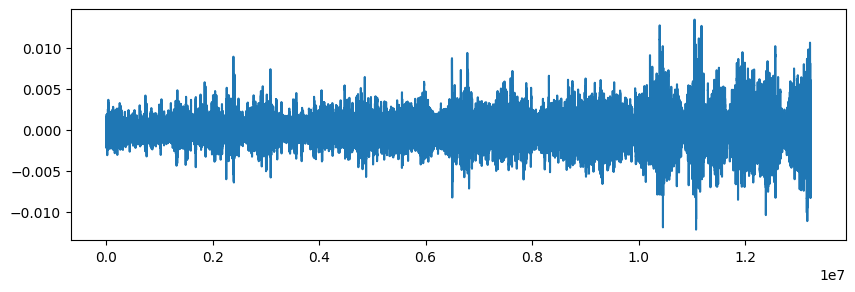

In [5]:
print(path)
plt.figure(figsize=(10, 3))
plt.plot(audio_data)

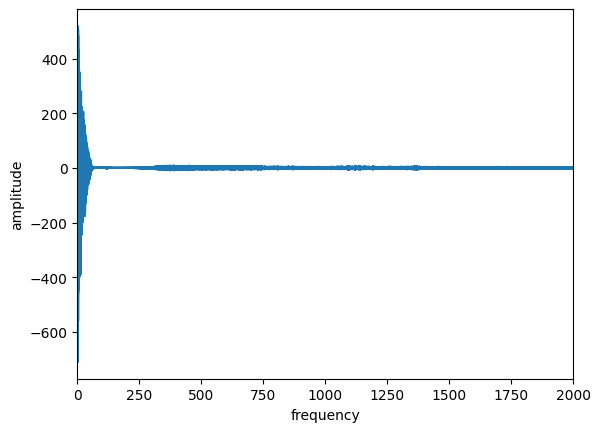

In [19]:
len_data = len(audio_data)

channel_1 = np.zeros(2**(int(np.ceil(np.log2(len_data)))))
channel_1[0:len_data] = audio_data

fourier = fft.fft(channel_1)
w = np.linspace(0, 44000, len(fourier))

# First half is the real component, second half is imaginary
fourier_to_plot = fourier[0:len(fourier)//2]
w = w[0:len(fourier)//2]

plt.figure(1)

plt.plot(w, fourier_to_plot)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim(0,2000)
plt.show()

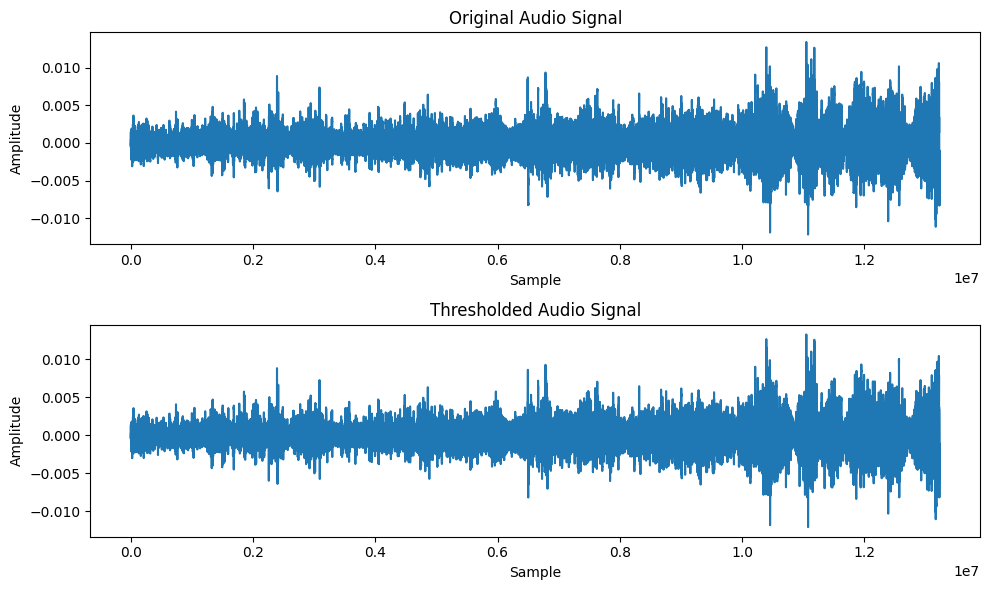

In [7]:
import pywt
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt


# Apply Discrete Wavelet Transform (DWT) to decompose the audio data
coeffs = pywt.wavedec(audio_data, 'db13')

# Define the threshold value (you may need to adjust this based on your data)
threshold_value = 0.0001

# Apply soft thresholding to the wavelet coefficients
thresholded_coeffs = [pywt.threshold(c, threshold_value, mode='soft') for c in coeffs]

# Reconstruct the thresholded audio data
thresholded_audio_data = pywt.waverec(thresholded_coeffs, 'db13')

sf.write(os.path.join(output_path, 'thresh0001.wav'), 
            thresholded_audio_data, sample_rate)

# Plot original and thresholded audio signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title('Original Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(thresholded_audio_data)
plt.title('Thresholded Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


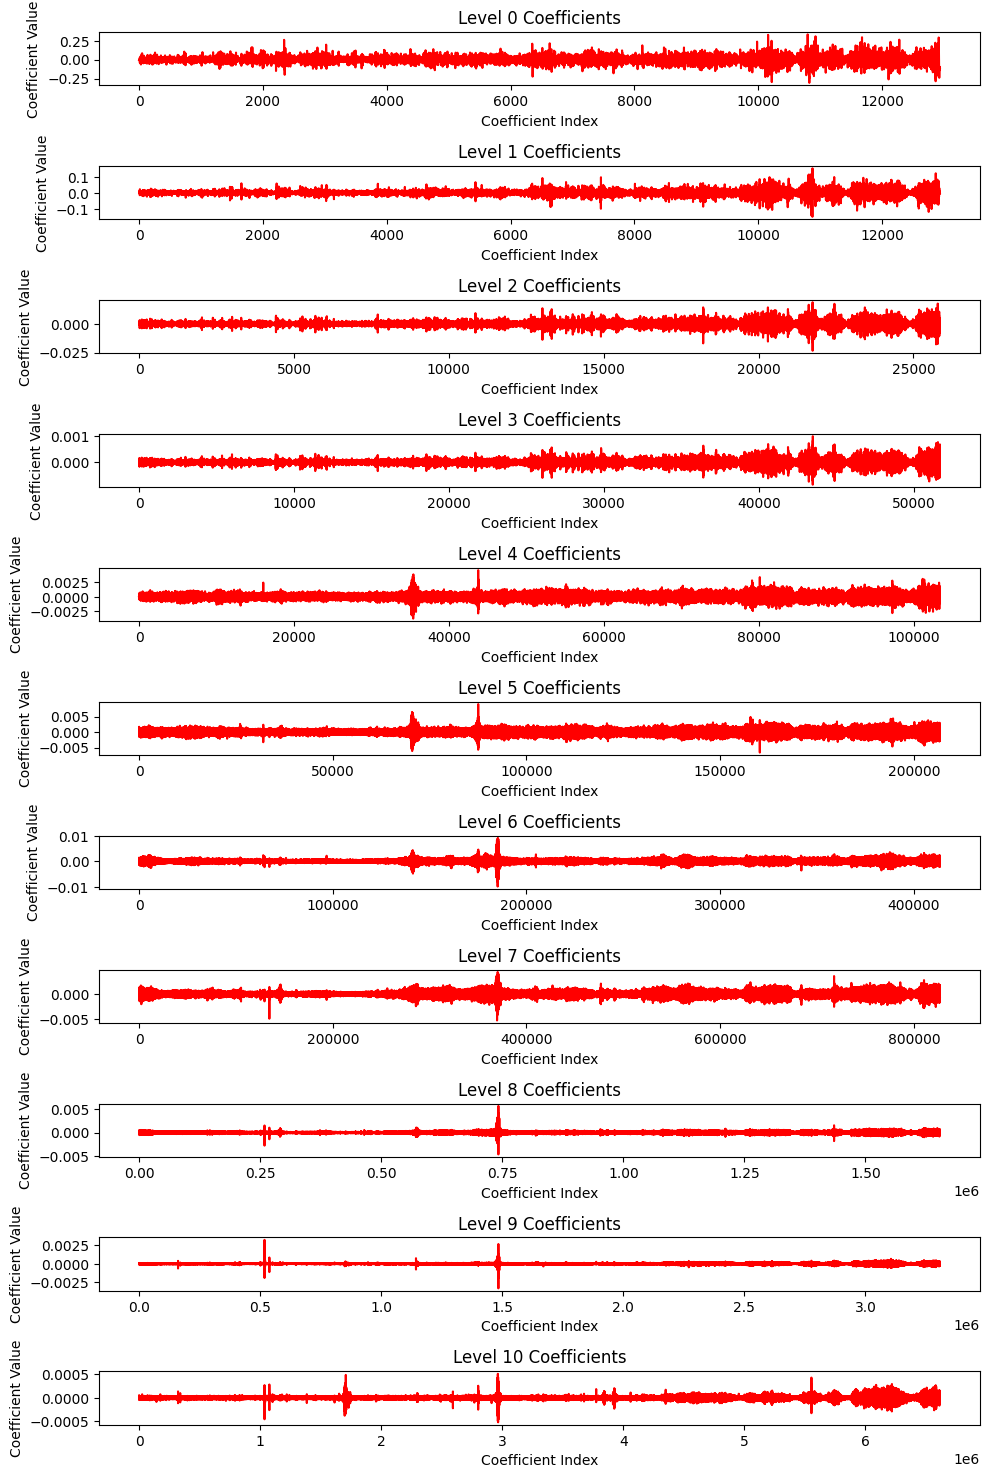

In [8]:
# Define wavelet parameters
wavelet_name = 'sym10'  # Choose a wavelet, such as Daubechies 4
level = 10  # Decomposition level

# Perform wavelet transform
coeffs = pywt.wavedec(audio_data, wavelet_name, level=level)

# Plot the wavelet coefficients
plt.figure(figsize=(10, 16))

# Plot wavelet coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i], color='r')
    plt.title(f'Level {i} Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')

# Plot approximation coefficients at the highest level
plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[level], color='r')
plt.title(f'Level {level} Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

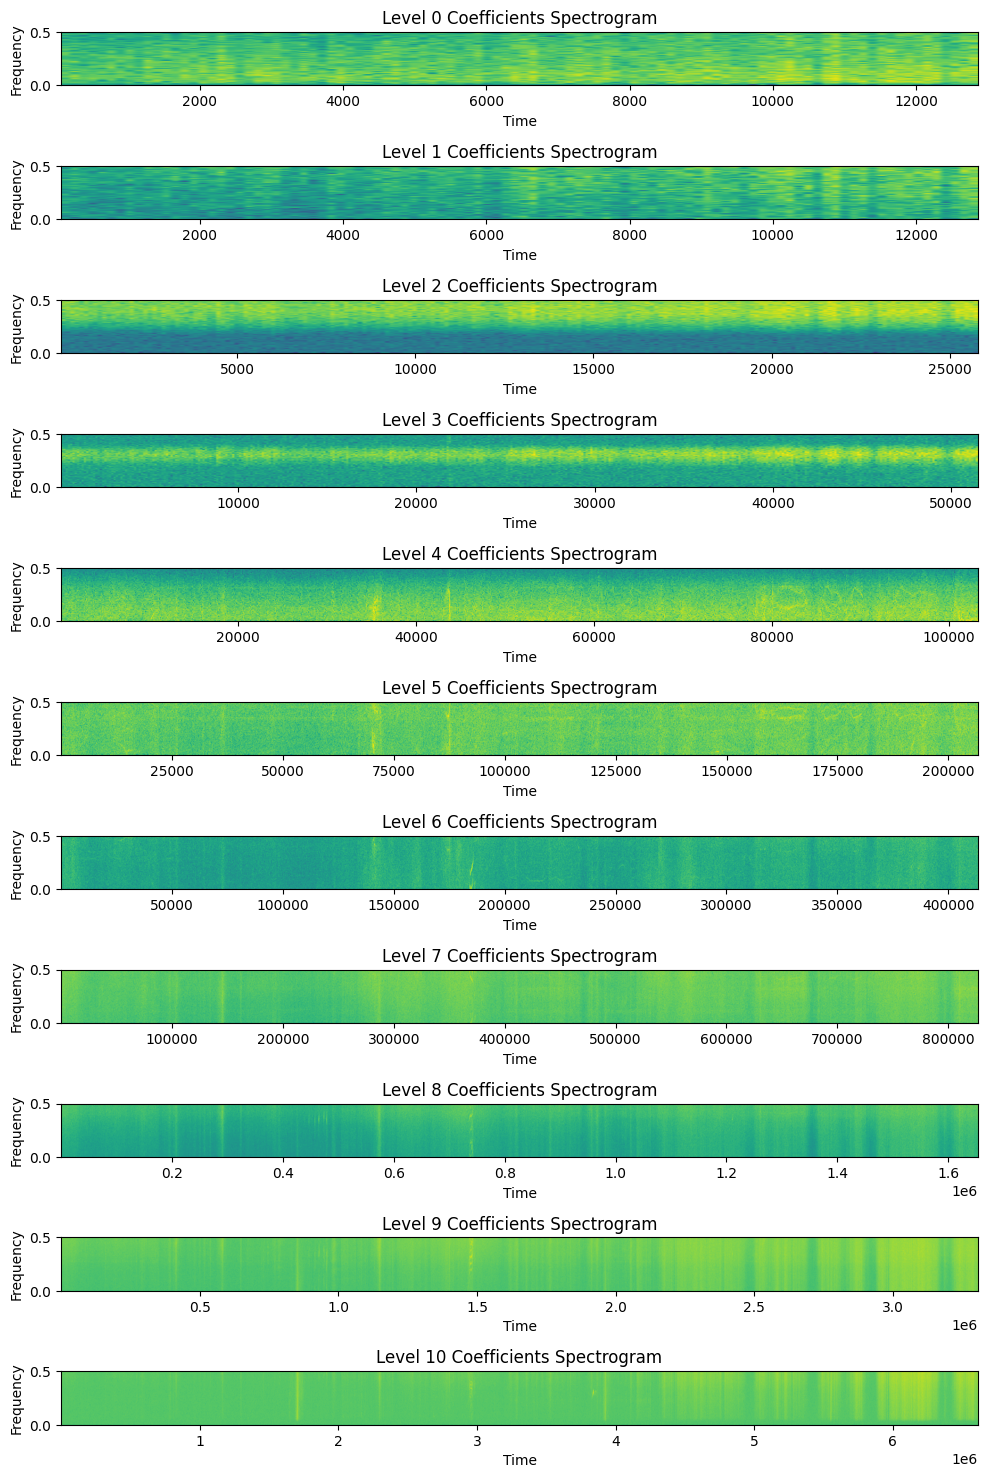

In [9]:
# Plot the spectrogram of wavelet coefficients
plt.figure(figsize=(10, 16))

# Plot spectrogram of wavelet coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.specgram(coeffs[i], Fs=1)
    plt.title(f'Level {i} Coefficients Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

# Plot spectrogram of approximation coefficients at the highest level
plt.subplot(level + 2, 1, level + 2)
plt.specgram(coeffs[level], Fs=1)
plt.title(f'Level {level} Coefficients Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

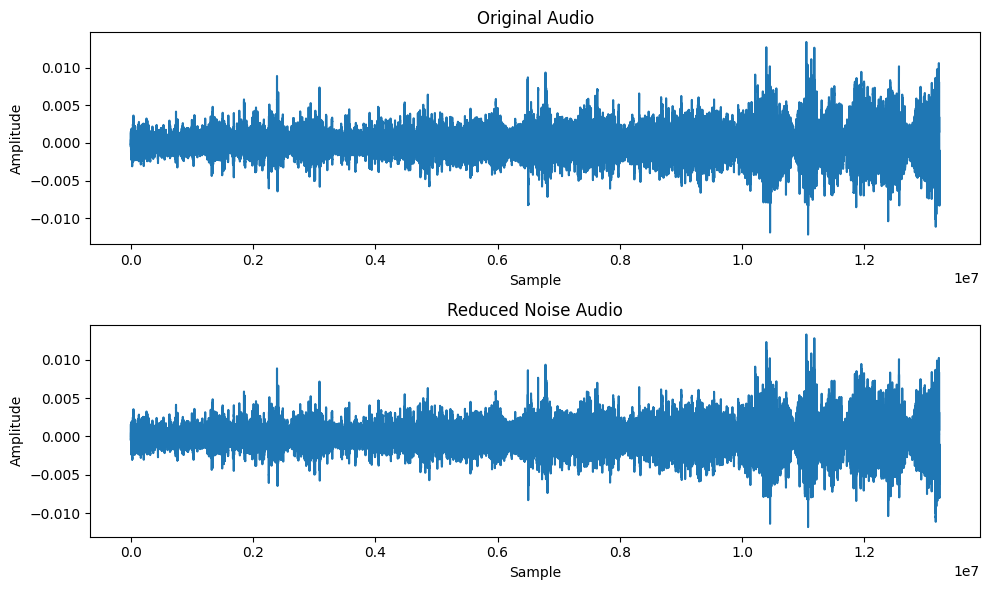

In [10]:
# Apply filtering (attenuate the approximation coefficients)
def filter_wavelets(coeffs, indexes_to_remove: list):
    return [c if (i not in indexes_to_remove) else np.zeros_like(c)
            for i, c in enumerate(coeffs)]

filtered_coeffs = filter_wavelets(coeffs, [2,3,4])

# Reconstruct signal using inverse wavelet transform
reconstructed_signal = pywt.waverec(filtered_coeffs, wavelet_name)

# Plot original and reduced noise data
plt.figure(figsize=(10, 6))

# Plot original audio
plt.subplot(2, 1, 1)
plt.title('Original Audio')
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot reduced noise audio
plt.subplot(2, 1, 2)
plt.title('Reduced Noise Audio')
plt.plot(reconstructed_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [11]:
# Save the denoised audio
if save_result:
    new_file_name = f'{audio_file.split('.')[0]}_filtered2.wav'
    sf.write(os.path.join(output_path, new_file_name), 
            reconstructed_signal, sample_rate)

In [12]:
# Save the difference audio
if save_result:
    difference = audio_data - reconstructed_signal
    new_file_name = f'{audio_file.split('.')[0]}_difference2.wav'
    sf.write(os.path.join(output_path, new_file_name),
            difference, sample_rate)

In [13]:
def save_each_coeff(coeffs, path, name):
    for i in range(len(coeffs)):
        coeff_audio = filter_wavelets(coeffs, [j for j in range(len(coeffs)) if j != i])
        coeff_audio = pywt.waverec(coeff_audio, wavelet_name)
        sf.write(os.path.join(path, f'{name}{i}.wav'),
                 coeff_audio, sample_rate)

save_each_coeff(coeffs, output_path, 'sr1f_component')
